In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("farm_data.csv")


In [5]:
label_encoders = {}
for column in ["Soil Type", "Water Resources", "Previous Crop"]:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [6]:
df.head()

,Soil Type,Farm Area,Water Resources,Number of Workers,Previous Crop,Current Address
0,0,579.722212,0,9,1,"85736 Richardson Plains, Hansonville, WI 61733"
1,3,686.482914,0,7,0,"8032 Miller Mill, West Kelsey, MO 11698"
2,2,397.645746,2,13,1,"70598 Charles Flats Suite 538, South Michaelst..."
3,1,429.664200,2,18,0,"4137 Martin Cliffs, Port Carloston, VI 72004"
4,3,705.232019,0,1,3,"8006 Kimberly Key, Andersonmouth, IL 06102"


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_19312\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

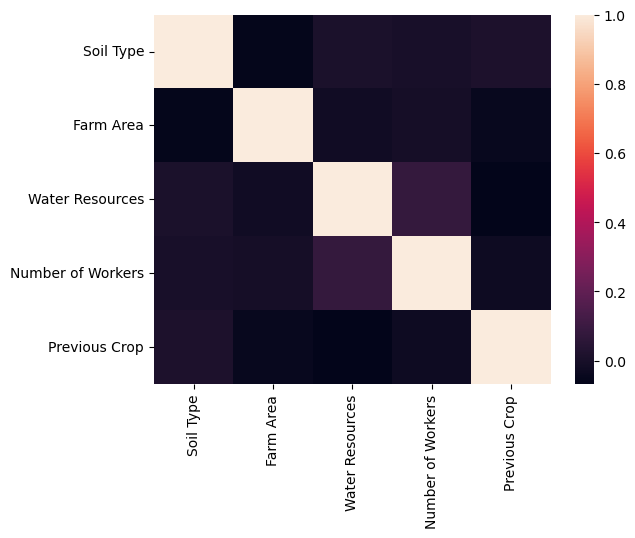

In [7]:
sns.heatmap(df.corr())

In [8]:
X = df.drop(columns=["Current Address", "Previous Crop"])  # Features
y = df["Previous Crop"] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.16666666666666666


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search CV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the testing set with the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after hyperparameter tuning:", accuracy)


In [ ]:
df.head()